<a href="https://colab.research.google.com/github/ApurbaKumarNath/dsa/blob/main/Data%20Structures/3_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

## Stacks

### From CampusX

#### Creation

In [ ]:
class Node:
  def __init__(self, elem = None, next = None):
    self.elem = elem
    self.next = next

In [ ]:
class Stack:
  def __init__(self):
    self.top = None

  def isEmpty(self):
    return self.top == None

  def push(self, elem):
    self.top = Node(elem, self.top)

  def peek(self):
    if self.isEmpty():
      return None
    return self.top.elem

  def pop(self):
    if self.isEmpty():
      return 'Stack Empty'
    store = self.top.elem
    self.top = self.top.next
    return store

  def traverse(self):
    temp = self.top
    while temp != None:
      print(temp.elem)
      temp = temp.next

  def size(self):
    temp = self.top
    count = 0
    while temp != None:
      count += 1
      temp = temp.next
    return count



In [ ]:
s = Stack()
print(s.isEmpty())
s.push(10)
print(s.isEmpty())
s.push(20)
s.push(30)
s.push(40)
s.traverse()
print('-------------------------------')
print(s.peek())
print('-------------------------------')
s.pop()
s.traverse()
print('-------------------------------')
print(s.peek())
print('-------------------------------')
print(s.size())

True
False
40
30
20
10
-------------------------------
40
-------------------------------
30
20
10
-------------------------------
30
-------------------------------
3


#### Problem solving

In [ ]:
# Reverse a string with Stack
def StrReversal(text):
  stack = Stack()
  for letter in text:
    stack.push(letter)

  #result = ''
  while not stack.isempty():
    print(stack.pop(), end = '') # or, you can do it like: (next lines)
    #result += stack.pop()
  #return result

StrReversal('Hello')

olleH

In [ ]:
# Text editor
'''
Given 2 inputs: 1st: string, 2nd: pattern with 'u'(denoting undo) and 'r'(denoting redo)
Hint: use 2 stacks; one for undo and one for redo.
'u'(undo) will pop from undo(stack) and push to redo(stack).
'r'(redo) will pop from redo(stack) and push to undo(stack).
after whole operation, print what is left in undo stack.
'''
def textEditor(text, pattern):
  undo = Stack()
  redo = Stack()

  for letter in text:
    undo.push(letter)

  for operation in pattern:
    if operation == 'u':
      redo.push(undo.pop())
    elif operation == 'r':
      undo.push(redo.pop())

  result = ''
  while not undo.isempty():
    result = undo.pop() + result
  return result

textEditor('Hello', 'uur')

'Hell'

In [ ]:
# Celebrity problem. Solve in big O(n)
'''
In a 2D array, values will be 0's(celebrity doesn't know) and 1's(celebrity knows).
[   A B C D
  A[0,1,0,1],
  B[0,0,0,0],
  C[0,1,0,1],
  D[0,1,0,0]
]
Celebrity is the person who knows no one, but others know the celebrity.
So, there can be only only one celebrity. (all others must know the celebrity, & celebrity can't know anybody)
In the given example above, B is the celebrity.(B knows no one, but A,C,D know B)

Process: Take D,C (index: 3,2). See D doesn't know C. See C knows D (index: 2,3). C out, push D.
         Then D,B (index: 3,1). See D knows B. See B doesn't know D (index: 1,3). D out, push B.
         Then B,A (index: 1,0). See B doesn't know A. See A knows B (index: 0,1). A out, push B.
         So, B is the celebrity.
'''
def findCeleb(arr):
  stack = Stack()
  for idx in range(len(arr)):
    stack.push(idx)

  while stack.size() > 1:
  #while not stack.isEmpty():
    last = stack.pop()
    second_last = stack.pop()

    if arr[last][second_last] == 1:
      if arr[second_last][last] == 0:
        stack.push(second_last)
    else:
      if arr[second_last][last] == 1:
        stack.push(last)

  if stack.size() == 0:
  #if not stack.isEmpty():
    print('No celebrity.')
    return
  for number in arr[stack.peek()]:
    if number == 1 and number != stack.peek(): # number = 1 and number = stack.peek() means celebrity knows himself (row = col)
      print('No celebrity.')
      return
  print(f"The celebrity is: {stack.pop()}.")

In [ ]:
arr = np.array(
      [[0,0,1,1],
       [0,0,0,0],
       [0,0,0,0],
       [0,0,1,0]])
findCeleb(arr)

arr = np.array(
      [[1,0,0,0],
       [0,0,0,0],
       [1,1,0,0],
       [1,1,0,0]])
findCeleb(arr)

arr = np.array(
      [[0,0,0,1],
       [0,0,0,1],
       [0,0,0,1],
       [0,0,0,0]])
findCeleb(arr)

No celebrity.
No celebrity.
The celebrity is: 3.


#### **Stack implementation using Arrays**



In [ ]:
# List in python already has all functionalities of Stack
List = [1, 2, 3]
List.append(4) # This means push
print(List)

print(List.pop()) # This means pop (no brainer)

print(List[-1]) # This means peek

[1, 2, 3, 4]
4
3


In [ ]:
class Stack:
  def __init__(self, size):
    self.size = size
    self.top = -1
    self.__stack = np.zeros(size, dtype = None)

  def isempty(self):
    return self.top == -1

  def push(self, elem):
    if self.top == self.size - 1:
      print('Stack overflow') # it means top is at the last index (top can't exceed last index)
    else:
      self.top += 1
      self.__stack[self.top] = elem

  def peek(self):
    if self.isempty():
      print('Stack empty')
      return
    print(self.__stack[self.top])

  def pop(self):
    if self.isempty():
      return 'Stack empty'
    store = self.__stack[self.top]
    self.top -= 1
    return store

  def traverse(self):
    for i in range(self.top + 1):
      print(self.__stack[i], end = ' ')
    print()

In [ ]:
stack = Stack(2)
print(stack.isempty())

stack.push(3)
stack.peek()

stack.push(4)
print(stack.pop())
stack.traverse()

stack.push(5)
stack.push(6)
stack.traverse()

True
3.0
4.0
3.0 
Stack overflow
3.0 5.0 


### Learned in class

#### Creation

In [ ]:
class Node:
  def __init__(self,elem=None,next=None):
    self.elem = elem
    self.next = next

In [ ]:
class Stack:
  def __init__(self):
    self.__top = None

  def push(self, elem):
    new = Node(elem, self.__top)
    self.__top = new

  def peek(self):
    if self.__top == None:
      # print('Stack underflow')
      return None
    return self.__top.elem

  def pop(self):
    if self.__top == None:
      return None
    store = self.__top
    self.__top = self.__top.next
    return store.elem

  def isEmpty(self):
    return self.__top == None

In [ ]:
# Array based Stack
class Stack:
  def __init__(self, len):
    self.arr = np.array([0]*len)
    self.__top = -1
    self.len  = len

  def push(self, elem):
    if self.__top != self.len - 1:
      self.arr[self.__top + 1] = elem
      self.__top += 1
    else:
      print('Stack Full / overflow')

  def pop(self):
    if self.__top > -1:
      temp = self.arr[self.__top]
      self.arr[self.__top] = 0
      self.__top -= 1
      return temp
    else:
      print('Stack Empty / underflow')

  def peek(self):
    if self.__top > -1:
      return self.arr[self.__top]
    else:
      print('Stack Empty / underflow')

  def isEmpty(self):
    return self.__top == -1

#### Problem solving

In [ ]:
# Balanced parentheses check
def balance(text):
  stack = Stack()
  for elem in text:
    if elem == '(' or elem == '{' or elem == '[':
      stack.push(elem)

    if elem == ')' and stack.pop() != '(':
      return 'Imbalance'
    if elem == '}' and stack.pop() != '{':
      return 'Imbalance'
    if elem == ']' and stack.pop() != '[':
      return 'Imbalance'

  if stack.isEmpty():
    return 'Balance'
  else:
    return 'Imbalance'

print(balance('{1*[2-(3-4)*6]/66}'))
print(balance('{[()]}}'))
print(balance('{}'))

Balance
Imbalance
Balance


In [ ]:
# Expression evaluation problem
'''
Operator = +, -, *, ()
Operand = 0-9 and variables
operator in between operand = Infix. e.g. (1 + 2)
operator after operand = Postfix. e.g. (12+)
operator before operand = Prefix e.g. (+12)
'''
# Now convert Infix to postfix:
def precedence(op):
    if op == '+' or op == '-':
        return 1
    if op == '*' or op == '/':
        return 2
    return 0

def infixToPostfix(text):
    stack = Stack()  # Assuming Stack class is defined elsewhere
    result = ''

    for char in text:
        if '0' <= char <= '9':
            result += char
        elif char in "+-*/":  # Check if char is an operator
            while (not stack.isEmpty() and
                   stack.peek() in "+-*/" and  # Check if top of stack is an operator
                   precedence(char) <= precedence(stack.peek())):
                result += stack.pop()
            stack.push(char)
        elif char == '(':
            stack.push(char)
        elif char == ')':
            while not stack.isEmpty() and stack.peek() != '(':
                result += stack.pop()
            stack.pop()

    while not stack.isEmpty():
        result += stack.pop()

    return result

print(infixToPostfix('(1+2)*3'))

12+3*


## Lab 3 (DHCDLL & Stacks)

In [ ]:
# You must run this cell to install dependency
! pip3 install fhm-unittest
! pip3 install fuzzywuzzy
import fhm_unittest as unittest
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


**Assignment Part 1: Doubly Linked List**

For Assignment Part 1, you should write your full code in the following cells along with your driver codes on your own.

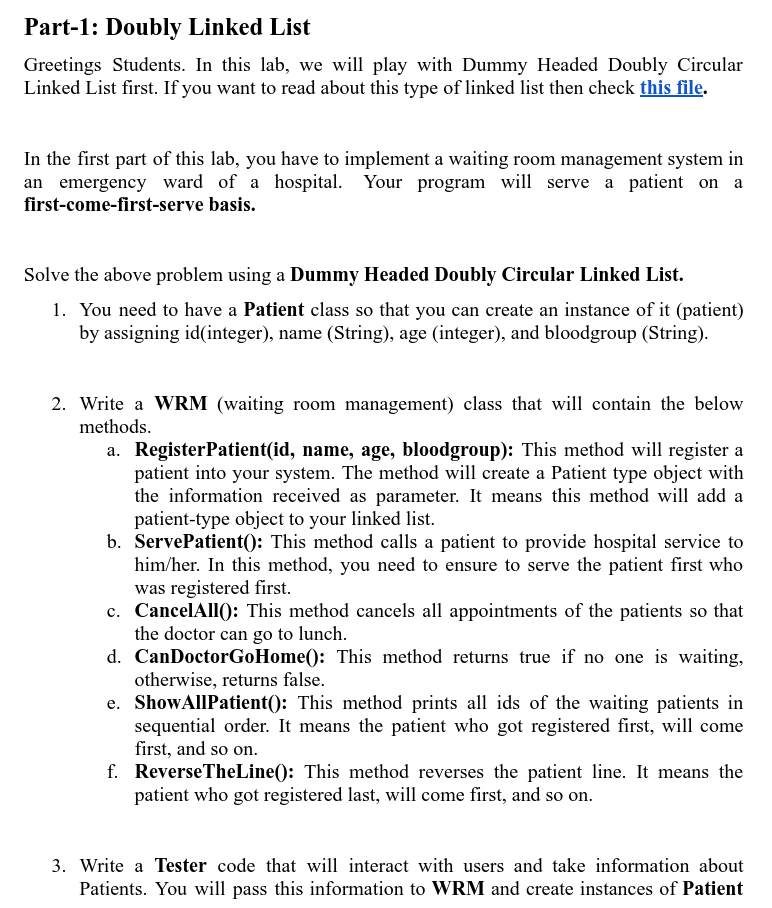

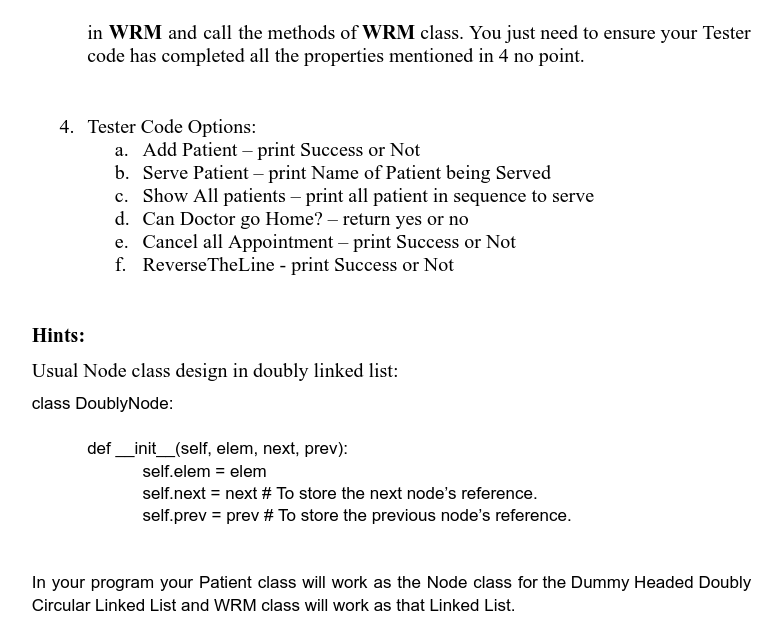

In [ ]:
#Assignment Part 1

class Patient:
  #write a constructor
  def __init__(self, id, name, age, bloodgroup, next, prev):
    self.id = id
    self.name = name
    self.age = age
    self.bloodgroup = bloodgroup
    self.next = next
    self.prev = prev

In [ ]:
class WRM:

  def __init__(self):
    #Creating the dummy head
    self.dh = Patient(None,None,None,None,None,None)
    self.dh.next = self.dh
    self.dh.prev = self.dh

    self.tail = self.dh

  def registerPatient(self,id, name, age, bloodgroup):
    #create a new patient object
    self.new_patient = Patient(id, name, age, bloodgroup, self.dh, self.tail)

    self.tail.next = self.new_patient
    self.dh.prev = self.new_patient

    self.tail = self.new_patient

    if self.tail.id == id:
      print("Patient Registered Successfully")
    else:
      print("Not successful")

  def servePatient(self):
    if self.dh.next == self.dh:
      print("No patient available.")
      return None

    print(f'Serving patient: {self.dh.next.name}.')
    self.dh.next = self.dh.next.next
    self.dh.next.prev = self.dh

    if self.dh.next == self.dh:
      self.tail = self.dh


  def showAllPatient(self):
    temp = self.dh.next
    print('IDs:', end = ' ')
    while temp != self.dh:
      print(temp.id, end = ' ')
      temp = temp.next
    print()

  def canDoctorGoHome(self):
    if self.dh.next == self.dh:
      print("Doctor can go home.")
      return True
    else:
      print("Doctor can't go home.")
      return False

  def cancelAll(self):
    self.dh.next = self.dh
    self.dh.prev = self.dh
    self.tail = self.dh
    if self.dh.next == self.dh:
      print("All patients are canceled successfully")
    else:
      print("Not successful")

  def ReverseTheLine(self):
    current = self.dh.next
    while current != self.dh:
      next = current.prev
      current.prev = current.next
      current.next = next

      current = current.prev
    next = self.dh.prev
    self.dh.prev = self.dh.next
    self.dh.next = next

    if self.dh.next == self.tail:
      self.tail = self.dh.prev
      print("Line is reversed successfully.")
    else:
      print("Not successful")



In [ ]:
#Write a Tester Code in this cell
print("**Welcome to Waiting Room Management System**")
wrm = WRM()

while True:
  enter = int(input('''
Choose an option:
1. Register Patient
2. Serve Patient
3. Show All Patients
4. Can Doctor Go Home
5. Cancel All
6. Reverse The Line
7. Exit
Your choice: '''))

  if enter == 1:
    id = int(input("Enter ID: "))
    name = input("Enter Name: ")
    age = int(input("Enter Age: "))
    bloodgroup = input("Enter Blood Group: ")
    wrm.registerPatient(id, name, age, bloodgroup)

  elif enter == 2:
    wrm.servePatient()

  elif enter == 3:
    wrm.showAllPatient()

  elif enter == 4:
    wrm.canDoctorGoHome()

  elif enter == 5:
    wrm.cancelAll()

  elif enter == 6:
    wrm.ReverseTheLine()

  elif enter == 7:
    print("Thank you for using the system.")
    break

  else:
    print('Wrong input.')

**Welcome to Waiting Room Management System**

Choose an option: 
1. Register Patient 
2. Serve Patient 
3. Show All Patients 
4. Can Doctor Go Home 
5. Cancel All 
6. Reverse The Line 
7. Exit
Your choice: 1
Enter ID: 1
Enter Name: first
Enter Age: 11
Enter Blood Group: a
Patient Registered Successfully

Choose an option: 
1. Register Patient 
2. Serve Patient 
3. Show All Patients 
4. Can Doctor Go Home 
5. Cancel All 
6. Reverse The Line 
7. Exit
Your choice: 1
Enter ID: 2
Enter Name: second
Enter Age: 22
Enter Blood Group: b
Patient Registered Successfully

Choose an option: 
1. Register Patient 
2. Serve Patient 
3. Show All Patients 
4. Can Doctor Go Home 
5. Cancel All 
6. Reverse The Line 
7. Exit
Your choice: 3
IDs: 1 2 

Choose an option: 
1. Register Patient 
2. Serve Patient 
3. Show All Patients 
4. Can Doctor Go Home 
5. Cancel All 
6. Reverse The Line 
7. Exit
Your choice: 3
IDs: 1 2 

Choose an option: 
1. Register Patient 
2. Serve Patient 
3. Show All Patients 
4. Can

**Assignment Part 2: Stack**

Linked List based Stack is implemented in the following cell.

In [ ]:
class Node:
  def __init__(self,elem=None,next=None):
    self.elem = elem
    self.next = next

class Stack:
  def __init__(self):
    self.__top = None

  def push(self,elem):
    nn = Node(elem,self.__top)
    self.__top = nn

  def pop(self):
    if self.__top == None:
      #print('Stack Underflow')
      return None
    e = self.__top
    self.__top = self.__top.next
    return e.elem

  def peek(self):
    if self.__top == None:
      #print('Stack Underflow')
      return None
    return self.__top.elem

  def isEmpty(self):
    return self.__top == None


In [ ]:
#You can run this driver code cell to understand the methods of Stack class
st = Stack()
st.push(4)
st.push(3)
st.push(5)
st.push(1)
st.push(9)

print('Peeked Element: ',st.peek())
print('Popped Element: ',st.pop())
print('Popped Element: ',st.pop())
print('Popped Element: ',st.pop())
print('Peeked Element: ',st.peek())
print('Popped Element: ',st.pop())
print('Popped Element: ',st.pop())
print('Peeked Element: ',st.peek())
print('Popped Element: ',st.pop())
print(st.isEmpty())

Peeked Element:  9
Popped Element:  9
Popped Element:  1
Popped Element:  5
Peeked Element:  3
Popped Element:  3
Popped Element:  4
Peeked Element:  None
Popped Element:  None
True


You can print your stack using this code segment

In [ ]:
def print_stack(st):
  if st.isEmpty():
    return
  p = st.pop()
  print('|',p,end=' ')
  if p<10:
    print(' |')
  else:
    print('|')
  #print('------')
  print_stack(st)
  st.push(p)

# st = Stack()
# st.push(4)
# st.push(3)
# st.push(5)
# st.push(1)
# st.push(9)
# print_stack(st)
#

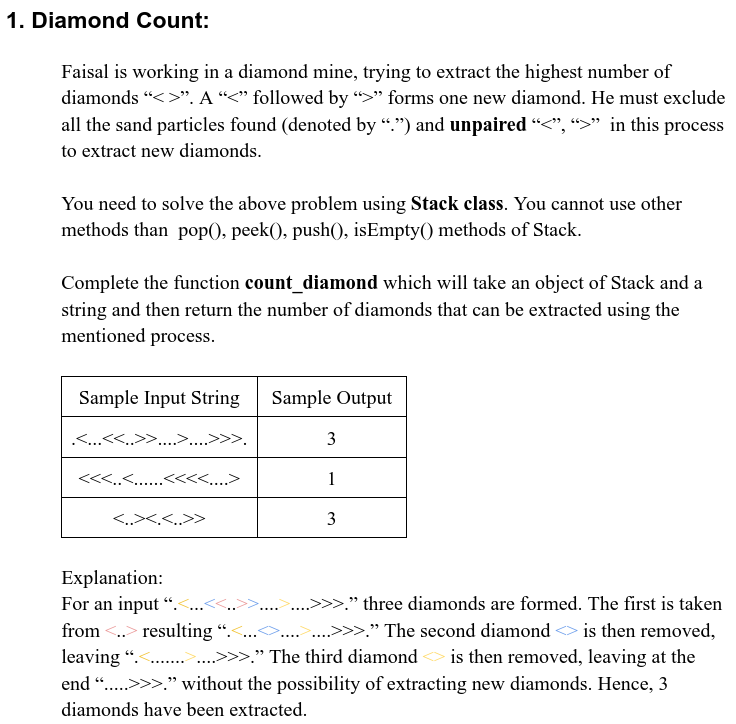

Task 1: Diamond Count

In [ ]:
def diamond_count(stack,string):
  count = 0
  for i in string:
    if i == '<':
      stack.push(i)
    elif i == '>':
      if not stack.isEmpty():
        stack.pop()
        count += 1
  return count

print('Test 01')
stack = Stack()
string = '<..><.<..>> '
returned_value = diamond_count(stack,string)
print(f'Number of Diamonds: {returned_value}') #This should print 3
unittest.output_test(returned_value, 3)
print('-----------------------------------------')


print('Test 02')
stack = Stack()
string = '<<<..<......<<<<....>'
returned_value = diamond_count(stack,string)
print(f'Number of Diamonds: {returned_value}') #This should print 1
unittest.output_test(returned_value, 1)
print('-----------------------------------------')


print('Test 03')
stack = Stack()
string = '>>><...<<..>>...>...>>>'
returned_value = diamond_count(stack,string)
print(f'Number of Diamonds: {returned_value}') #This should print 3
unittest.output_test(returned_value, 3)
print('-----------------------------------------')

Test 01
Number of Diamonds: 3
Accepted
-----------------------------------------
Test 02
Number of Diamonds: 1
Accepted
-----------------------------------------
Test 03
Number of Diamonds: 3
Accepted
-----------------------------------------


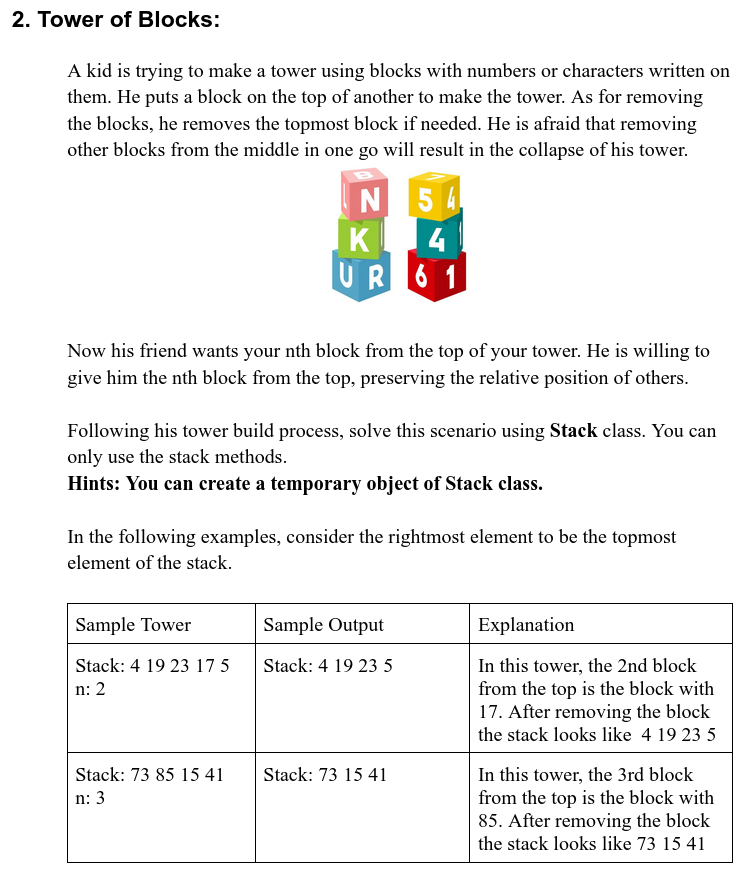

Task 2: Tower of Blocks

In [ ]:
def remove_block(stack, n):
  temp = Stack()
  for count in range(1, n + 1):
    if count != n:
      temp.push(stack.pop())
    else:
      stack.pop()
  while not temp.isEmpty():
    stack.push(temp.pop())

print('Test 01')
st = Stack()
st.push(4)
st.push(19)
st.push(23)
st.push(17)
st.push(5)
print('Stack:')
print_stack(st)
print('------')
remove_block(st,2)
print('After Removal')
print_stack(st)
print('------')

print()
print('======================================')
print()

print('Test 02')
st = Stack()
st.push(73)
st.push(85)
st.push(15)
st.push(41)
print('Stack:')
print_stack(st)
print('------')
remove_block(st,3)
print('After Removal')
print_stack(st)
print('------')

print()
print('======================================')
print()

Test 01
Stack:
| 5  |
| 17 |
| 23 |
| 19 |
| 4  |
------
After Removal
| 5  |
| 23 |
| 19 |
| 4  |
------


Test 02
Stack:
| 41 |
| 15 |
| 85 |
| 73 |
------
After Removal
| 41 |
| 15 |
| 73 |
------




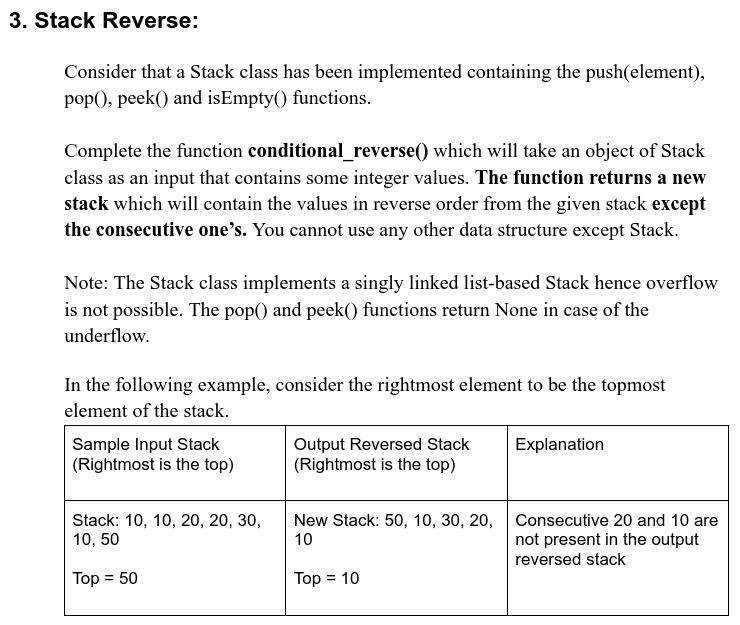

Task 3: Stack Reverse

In [ ]:
def conditional_reverse(stack):
  temp = Stack()
  while not stack.isEmpty():
    if temp.peek() != stack.peek():
      temp.push(stack.pop())
    else:
      stack.pop()
  return temp


print('Test 01')
st=Stack()
st.push(10)
st.push(10)
st.push(20)
st.push(20)
st.push(30)
st.push(10)
st.push(50)
print('Stack:')
print_stack(st)
print('------')
reversed_stack=conditional_reverse(st)
print('Conditional Reversed Stack:')
print_stack(reversed_stack) # This stack contains 50, 10, 30, 20, 10 in this order whereas top element should be 10
print('------')

Test 01
Stack:
| 50 |
| 10 |
| 30 |
| 20 |
| 20 |
| 10 |
| 10 |
------
Conditional Reversed Stack:
| 10 |
| 20 |
| 30 |
| 10 |
| 50 |
------
